In [2]:
import numpy as np
from matplotlib import pyplot as plt
from model import USV
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

# Load the environment setup as before
final_path = np.genfromtxt('turtlebot_positions.csv', delimiter=',', skip_header=1)
final_path = final_path[::10]
final_path[:,:2] *= 15
initial_positions = [(final_path[0][0], final_path[0][1], final_path[0][2])]
final_path = final_path[:,:2]

env = USV(
    v=0,
    dt=0.2,
    path_index=0,
    goal=final_path[-1],
    budget=10,
    initial_positions=initial_positions,
    final_paths=[final_path],
)

# Load a PPO model instead of a DQN model
model = PPO.load("ppo_communication_optimization_epsfrac07_steps10M_turtlebot_path_baseline")

obs,_ = env.reset()
done = False
total_rewards = 0
communicate_indices = []
variances = []
car_positions = [[env.car.x, env.car.y]]
errors = []

print("-------")

while not done:
    action, _states = model.predict(obs, deterministic=True)  # Use the model to predict the action
    print(f"action: {action}")
    
    if action == 1:
        communicate_indices.append(env.path_index)

    errors.append(np.linalg.norm(np.array([env.car.x, env.car.y]) - np.array([env.car.x_true, env.car.y_true])))
    variances.append(np.linalg.norm(env.car.pf_var))
    
    obs, rewards, terminated, truncated, info = env.step(action)  # Take the action in the environment
    print(f"rewards: {rewards}")
    
    car_positions.append([env.car.x, env.car.y])
    total_rewards += rewards
    done = truncated or terminated

# After the loop, you might want to plot the results or analyze the performance further


-------
action: 107
rewards: -1.0057384494474848
action: 107
rewards: -1.0885462888079882
action: 107
rewards: -1.0895791037648297
action: 107
rewards: -1.0827412709721163
action: 107
rewards: -1.088237071040842
action: 107
rewards: -1.0856684127721297
action: 107
rewards: -1.076170468834839
action: 107
rewards: -1.0599323569817967
action: 1205
rewards: -1.0506405895479456
action: 1205
rewards: -1.0601387142384506
action: 1205
rewards: -1.06293708496696
action: 1205
rewards: -1.0685070950385542
action: 1205
rewards: -1.0922901337394453
action: 1205
rewards: -1.10330405561916
action: 1205
rewards: -1.1186347648114856
action: 1205
rewards: -1.135697394771214
action: 1205
rewards: -1.1227405188008186
action: 1205
rewards: -1.1278139680008499
action: 1205
rewards: -1.1391923610013506
action: 1205
rewards: -1.1192941777329435
action: 1205
rewards: -1.1282149530746626
action: 1205
rewards: -1.1104162947670666
action: 1205
rewards: -1.1009855551632817
action: 1205
rewards: -1.1202469239727817

0


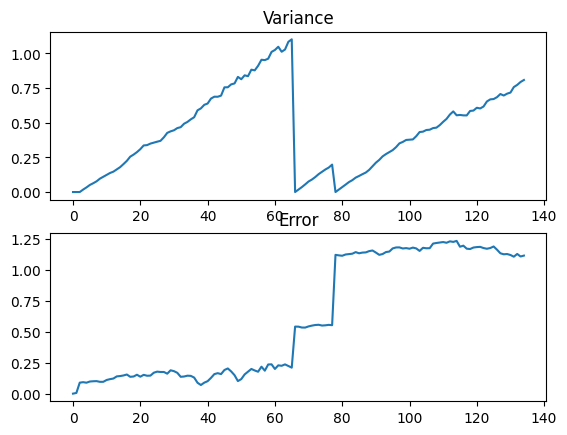

In [3]:
print(len(communicate_indices))
plt.subplot(2, 1, 2)
plt.plot(errors)
plt.scatter(communicate_indices, [errors[i] for i in communicate_indices], c='r')
plt.title("Error")
plt.subplot(2, 1, 1)
plt.plot(variances)
plt.scatter(communicate_indices, [variances[i] for i in communicate_indices], c='r')
plt.title("Variance")
plt.show()

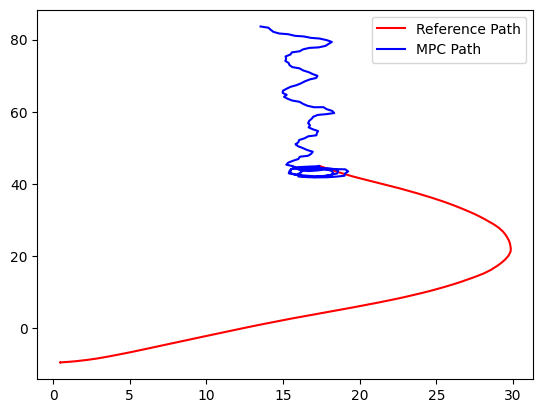

In [4]:
plt.plot(final_path[:, 0], final_path[:, 1], "r", label="Reference Path")
plt.plot(np.array(car_positions)[:, 0], np.array(car_positions)[:, 1], "b", label="MPC Path")
plt.legend()
plt.show()